In [5]:
!pip install requests
!pip install bs4
import requests
from bs4 import BeautifulSoup as bs

In [6]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
response= requests.get('https://www.nykaa.com/skin/c/8377')
response.status_code

200

In [9]:
content= response.text
len(content)

411946

In [10]:
doc= bs(content,"html.parser")

In [11]:
nametags=doc.find_all('div',{'class':'css-xrzmfa'})
for name in nametags:
    print(name.text)


Nykaa SKINRX 10% Vitamin C with 5% Niacinamide Illuminate + ...
Nykaa Naturals Skin Potion Glow Boosting Skincare Face Oil w...
Mamaearth Ubtan Face Wash With Turmeric & Saffron For Tan Re...
Nudestix Nudeskin 3-Step Citrus Skin Renewal For Gentle Skin
Garnier Bright Complete 30X VITAMIN C Booster Face Serum
Biotique Bio Papaya Revitalizing Tan removal Scrub
Plum 15% Vitamin C Face Serum with Mandarin for Glowing Skin...
Palmolive Brightening Souffle Face Scrub
Soulflower 2% Salicylic Acid & Tea Tree Foaming Face Wash Wi...
Nykaa Naturals Skin Secrets Exotic Indulgence Sheet Mask
The Ordinary Niacinamide 10% + Zinc 1%
Cetaphil Gentle Skin Cleanser
Ponds Super Light Gel Oil Free Moisturiser With Hyaluronic A...
Neutrogena UltraSheer Dry Touch Sunblock SPF 50+
Cetaphil Moisturising Cream
Neutrogena Hydro Boost Water Gel
COSRX Advanced Snail 96 Mucin Power Essence
Nykaa Naturals Skin Secrets Indian Rituals Sheet Mask
Estee Lauder Advanced Night Repair Synchronized Multi-Recove...
Minimali

In [12]:
originalprice =  doc.find_all('span',{'class':'css-17x46n5'})
for price in originalprice:
    print(price.text)

MRP:₹699
MRP:
MRP:₹249
MRP:
MRP:₹549
MRP:
MRP:₹550
MRP:₹599
MRP:₹450
MRP:
MRP:
MRP:₹305
MRP:
MRP:₹675
MRP:₹465
MRP:
MRP:
MRP:
MRP:
MRP:


In [13]:
offerprice=doc.find_all('span',{'class':'css-111z9ua'})
for offerp in offerprice:
    print(offerp.text)

₹594
₹699
₹232
₹2300
₹522
₹100
₹523
₹449
₹383
₹100
₹600
₹275
₹100
₹574
₹419
₹450
₹1450
₹100
₹5900
₹399


In [14]:
discount =  doc.find_all('span',{'class':'css-r2b2eh'})
for dis in discount:
    print(dis.text)

15% Off
7% Off
5% Off
5% Off
25% Off
15% Off
10% Off
15% Off
10% Off


In [15]:
offer = doc.find_all('p',{'class':'css-i6xqbh'})
for o in offer:
    print(o.text)

Get Free Product
Enjoy Free Gift
Extra 5% Off
Buy 5 Get 5 Free
Extra 5% Off
Extra 5% Off
Buy 5 Get 5 Free


In [16]:
reviews = doc.find_all('span',{'class':'css-1j33oxj'})
for r in reviews:
    print(r.text)

( 453 )
( 19138 )
( 3175 )
( 3 )
( 2417 )
( 52984 )
( 16719 )
( 150 )
( 41 )
( 184627 )
( 5868 )
( 51475 )
( 81461 )
( 77220 )
( 24739 )
( 37020 )
( 5520 )
( 23674 )
( 15385 )
( 9933 )


In [17]:
productDetails = []
for name,op,ofp,d,o,r in zip(nametags,originalprice,offerprice,discount,offer,reviews):
    productDetails.append({'Product Name' : name.text,
                            'Origional Prize' : op.text,
                            'Offer Prize' : ofp.text,
                            'Discount':d.text,
                            'Reviews' : r.text,
                            'Offer' : o.text})

In [18]:
productDetails[:4]

[{'Product Name': 'Nykaa SKINRX 10% Vitamin C with 5% Niacinamide Illuminate + ...',
  'Origional Prize': 'MRP:₹699',
  'Offer Prize': '₹594',
  'Discount': '15% Off',
  'Reviews': '( 453 )',
  'Offer': 'Get Free Product'},
 {'Product Name': 'Nykaa Naturals Skin Potion Glow Boosting Skincare Face Oil w...',
  'Origional Prize': 'MRP:',
  'Offer Prize': '₹699',
  'Discount': '7% Off',
  'Reviews': '( 19138 )',
  'Offer': 'Enjoy Free Gift'},
 {'Product Name': 'Mamaearth Ubtan Face Wash With Turmeric & Saffron For Tan Re...',
  'Origional Prize': 'MRP:₹249',
  'Offer Prize': '₹232',
  'Discount': '5% Off',
  'Reviews': '( 3175 )',
  'Offer': 'Extra 5% Off'},
 {'Product Name': 'Nudestix Nudeskin 3-Step Citrus Skin Renewal For Gentle Skin',
  'Origional Prize': 'MRP:',
  'Offer Prize': '₹2300',
  'Discount': '5% Off',
  'Reviews': '( 3 )',
  'Offer': 'Buy 5 Get 5 Free'}]

In [19]:
df = pd.DataFrame(productDetails,columns=['Product Name','Origional Prize','Offer Prize',
                                          'Discount','Reviews','Offer'])
df

,Product Name,Origional Prize,Offer Prize,Discount,Reviews,Offer
0,Nykaa SKINRX 10% Vitamin C with 5% Niacinamide...,MRP:₹699,₹594,15% Off,( 453 ),Get Free Product
1,Nykaa Naturals Skin Potion Glow Boosting Skinc...,MRP:,₹699,7% Off,( 19138 ),Enjoy Free Gift
2,Mamaearth Ubtan Face Wash With Turmeric & Saff...,MRP:₹249,₹232,5% Off,( 3175 ),Extra 5% Off
3,Nudestix Nudeskin 3-Step Citrus Skin Renewal F...,MRP:,₹2300,5% Off,( 3 ),Buy 5 Get 5 Free
4,Garnier Bright Complete 30X VITAMIN C Booster ...,MRP:₹549,₹522,25% Off,( 2417 ),Extra 5% Off
5,Biotique Bio Papaya Revitalizing Tan removal S...,MRP:,₹100,15% Off,( 52984 ),Extra 5% Off
6,Plum 15% Vitamin C Face Serum with Mandarin fo...,MRP:₹550,₹523,10% Off,( 16719 ),Buy 5 Get 5 Free


In [20]:
def get_page_contents(url):
    
    response= requests.get(url)
    if response.status_code==200:
        doc= bs(response.text,'html.parser')
        return doc

In [21]:
def get_productname(doc):
    
    productname = []

    for name in doc.find_all('div',{'class':'css-xrzmfa'}):
        productname.append(name.text)
    return productname

In [22]:
def get_productprice(doc):
    
    orgprice = [None if i.find('span',class_='css-17x46n5').text == 'MRP:' else i.find('span',class_='css-17x46n5').text
                for i in doc.find_all('div',class_='css-1d0jf8e') if i.find('span',class_='css-17x46n5')]
    
    return orgprice

In [23]:
def get_offer_price(doc):
    
    offerprice= [price.text if price else None for price in doc.find_all('span',{'class':'css-111z9ua'})]
    
    return offerprice

In [25]:
def get_free_gift(doc):
    
    freegift = [gift.find('p', class_ = 'css-i6xqbh').text if gift.find('p', class_ = 'css-i6xqbh') else None 
                for  gift in doc.find_all('div', {'class':'css-1rd7vky'}) ]
    
    return freegift

In [27]:
def getoffer(doc):
    
    offer = [i.find('span', class_ = 'css-r2b2eh').text if i.find('span', class_ = 'css-r2b2eh') else None 
             for i in doc.find_all('div', class_='css-1rd7vky')]
    
    return offer 

In [28]:
def getreview(doc):

    
    review = [r.text if r else None for r in doc.find_all('span',{'class':'css-1j33oxj'})]
    return review

In [29]:
def dictionary(productname,orgprice,offerprice,freegift,offer,review):
    
    d = []
    for productname,origionalprice,offerprice,freegift,offer,review in zip(productname,orgprice,offerprice,freegift,offer,review):
        d.append({'Product Name':productname,
                  'Origional Price':origionalprice,
                  'Offer Price':offerprice,
                  'Gift':freegift,
                  'Offer':offer,
                  'Review':review})
    return d

In [30]:
def create_df(*args):

    return pd.DataFrame(*args)

In [31]:
baseurl = 'https://www.nykaa.com/skin/c/8377?page_no='

finaldict = []

for i in range(30):
    doc = get_page_contents(baseurl+str(i))
    productname = get_productname(doc)
    orgprice = get_productprice(doc)
    offerprice = get_offer_price(doc)
    freegift = get_free_gift(doc)
    offer = getoffer(doc)
    review = getreview(doc)
    
    finaldict += dictionary(productname,orgprice,offerprice,freegift,offer,review)
    
df = create_df(finaldict)
df

,Product Name,Origional Price,Offer Price,Gift,Offer,Review
0,Nykaa SKINRX 10% Vitamin C with 5% Niacinamide...,MRP:₹699,₹594,Get Free Product,15% Off,( 453 )
1,Nykaa Naturals Skin Potion Glow Boosting Skinc...,None,₹699,Enjoy Free Gift,None,( 19138 )
2,Mamaearth Ubtan Face Wash With Turmeric & Saff...,MRP:₹249,₹232,Extra 5% Off,7% Off,( 3175 )
3,Nudestix Nudeskin 3-Step Citrus Skin Renewal F...,None,₹2300,None,None,( 3 )
4,Garnier Bright Complete 30X VITAMIN C Booster ...,MRP:₹549,₹522,None,5% Off,( 2417 )
...,...,...,...,...,...,...
593,MCaffeine Body Toning & Polishing Kit - Coffee...,MRP:₹1269,₹999,Enjoy Free Gift,21% Off,( 41016 )
594,Bio-Oil Original Face & Body Oil Suitable for ...,MRP:₹1200,₹1020,None,15% Off,( 3254 )
595,Cetaphil Daily Exfoliating Cleanser,MRP:₹850,₹765,None,10% Off,( 1199 )
596,Lakme Absolute Perfect Radiance Skin Brighteni...,None,₹499,None,None,( 5414 )


In [32]:
df['Review'] = df['Review'].str.replace('\(|\)','',regex=True)
df['Offer Price'] = df['Offer Price'].str.replace('\₹','',regex=True)
df['Origional Price'] = df['Origional Price'].str.replace('MRP:₹','',regex=True)

In [33]:
df[['Origional Price','Offer Price','Review']] = df[['Origional Price','Offer Price','Review']].apply(pd.to_numeric)
df.head()

,Product Name,Origional Price,Offer Price,Gift,Offer,Review
0,Nykaa SKINRX 10% Vitamin C with 5% Niacinamide...,699.0,594,Get Free Product,15% Off,453
1,Nykaa Naturals Skin Potion Glow Boosting Skinc...,NaN,699,Enjoy Free Gift,None,19138
2,Mamaearth Ubtan Face Wash With Turmeric & Saff...,249.0,232,Extra 5% Off,7% Off,3175
3,Nudestix Nudeskin 3-Step Citrus Skin Renewal F...,NaN,2300,None,None,3
4,Garnier Bright Complete 30X VITAMIN C Booster ...,549.0,522,None,5% Off,2417


In [34]:
df.shape


(598, 6)

In [35]:
df.isnull().sum()

Product Name         0
Origional Price    273
Offer Price          0
Gift               405
Offer              273
Review               0
dtype: int64

In [36]:
df['Offer'] = df['Offer'].fillna('0% Off')
df['Gift'] = df['Gift'].fillna('No Gift')
df['Origional Price'] = df['Origional Price'].fillna(df['Offer Price'])

In [37]:
df[:4]

,Product Name,Origional Price,Offer Price,Gift,Offer,Review
0,Nykaa SKINRX 10% Vitamin C with 5% Niacinamide...,699.0,594,Get Free Product,15% Off,453
1,Nykaa Naturals Skin Potion Glow Boosting Skinc...,699.0,699,Enjoy Free Gift,0% Off,19138
2,Mamaearth Ubtan Face Wash With Turmeric & Saff...,249.0,232,Extra 5% Off,7% Off,3175
3,Nudestix Nudeskin 3-Step Citrus Skin Renewal F...,2300.0,2300,No Gift,0% Off,3


<AxesSubplot:>

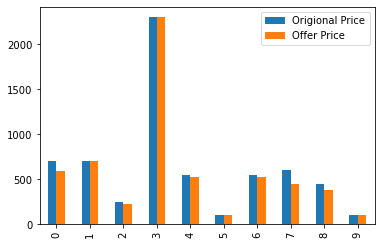

In [38]:
df[['Origional Price','Offer Price']][:10].plot(kind='bar')

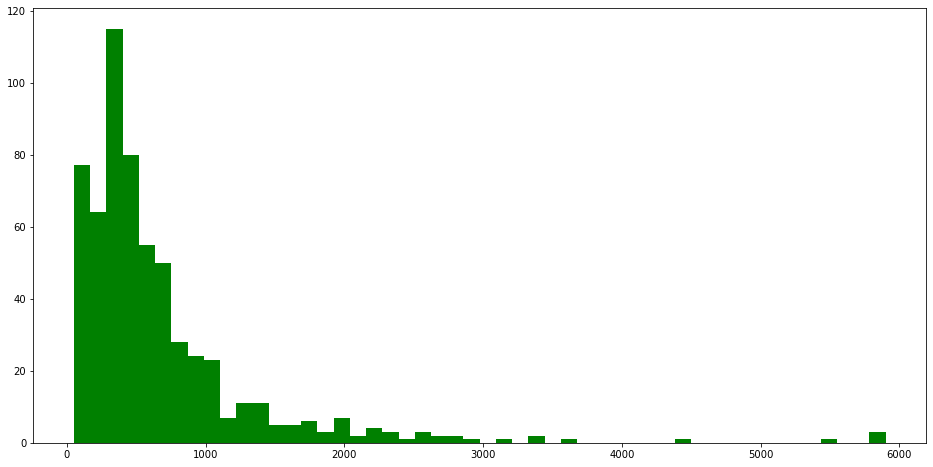

In [41]:
plt.figure(figsize = (16,8))
plt.hist(data = df, x = 'Origional Price',bins=50, color = 'Green');

<AxesSubplot:xlabel='Origional Price', ylabel='Count'>

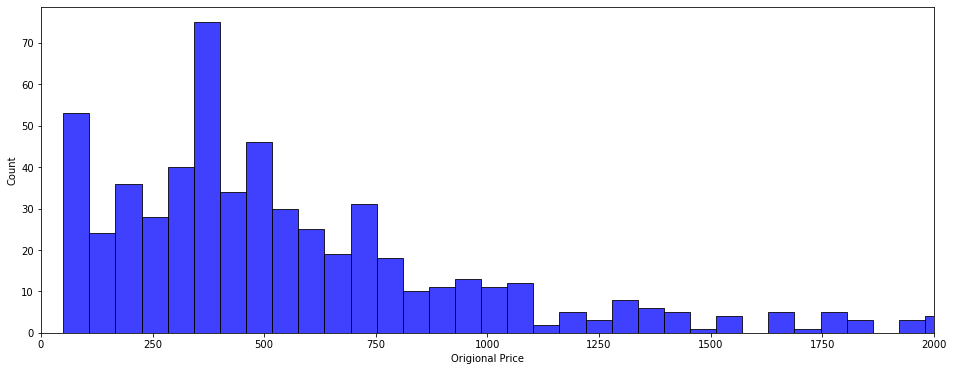

In [42]:
plt.figure(figsize = (16,6))
g = sns.histplot(data = df, x = 'Origional Price', bins = 100,color = 'Blue')
g.set(xlim = (0,2000))
g

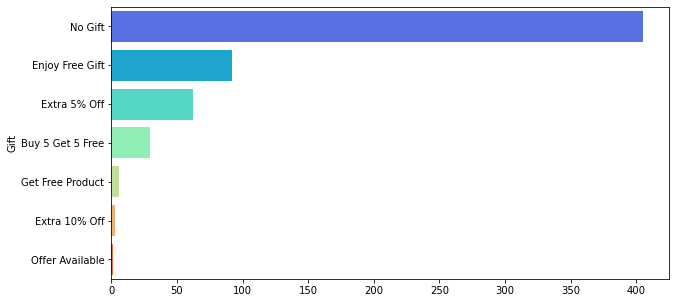

In [43]:
gift = df.value_counts('Gift').sort_values(ascending=False)
plt.figure(figsize = (10,5))
sns.barplot(y=gift.index,x = gift,palette='rainbow');

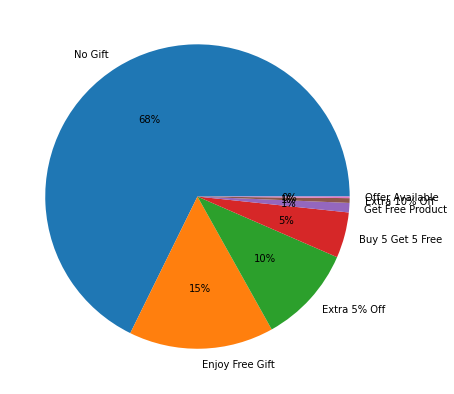

In [44]:
g = df['Gift'].value_counts().head(8)
plt.figure(figsize = (7,7))
plt.pie(x = g, data = df,labels = g.index,autopct='%.0f%%')
plt.show()

<AxesSubplot:ylabel='Offer'>

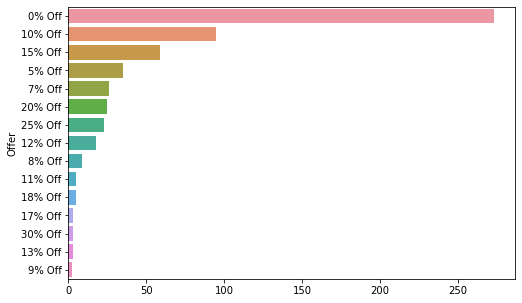

In [45]:
a = df.value_counts('Offer').sort_values(ascending=False)
plt.figure(figsize = (8,5))
sns.barplot(y=a.index[:15],x=a[:15])

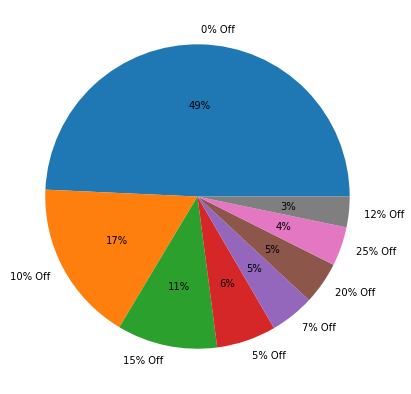

In [46]:
offer = df['Offer'].value_counts().head(8)
plt.figure(figsize = (7,7))
plt.pie(x = offer, data = df,labels = offer.index,autopct='%.0f%%')
plt.show()

Text(0.5, 1.0, 'Offer price of Product by Gift')

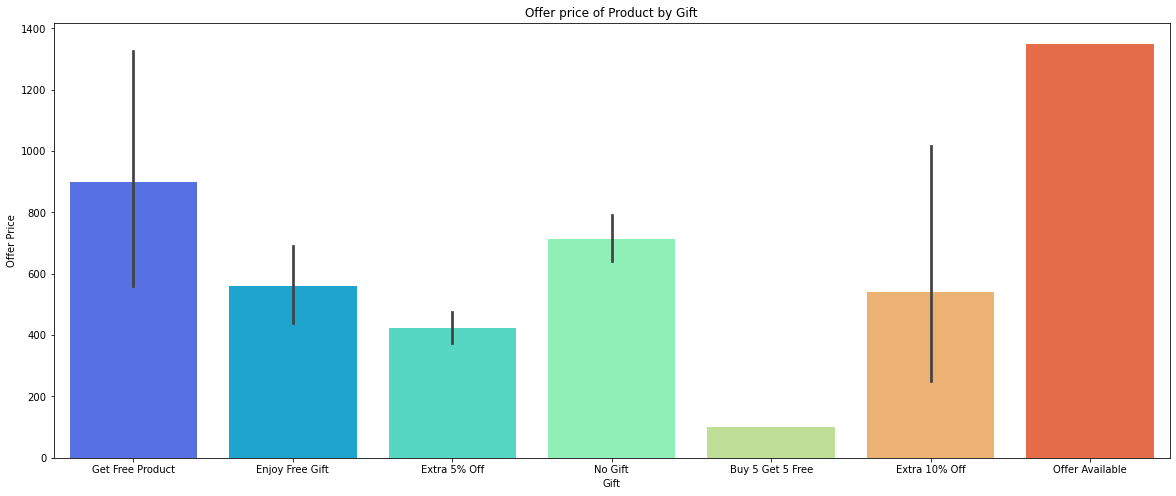

In [47]:
plt.figure(figsize=(20,8))
sns.barplot(x='Gift',y='Offer Price',data= df,palette='rainbow')
plt.title('Offer price of Product by Gift')